<a href="https://colab.research.google.com/github/BadrishKhanna/Machine_Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamental Machine Learning

In this project, we use the details of various bike trips (*stored in bike_sharing.csv*) such as ID of the trip, distance travelled, weather during the ride etc. and train the **Linear Regression** model.


**Objectives** :
*   Predict the trip time based on the other details.
*   Group the rides by similarities. (*clustering*)
*   Plot a graph between distance travelled and time taken for the trip.
*   Evaluate the model.





In [ ]:
# Modules Needed - pandas,matplotlib,seaborn and sklearn


%%writefile main.py
import pandas as pd
import build_the_model as btm
import cluster_the_data as ctd
import vizualize_the_data as vtd
import evaluate_the_model as etm
def main():

   #Call the functions
   btm.btm()
   etm.etm()
   ctd.ctd()
   vtd.vtdk()
   vtd.vtdm()

if __name__ == "__main__":
     main()


Writing main.py


In [ ]:
%%writefile build_the_model.py
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import data
import pandas as pd

Y_test = None
predictions = None
def btm():
  global X_train, X_test, Y_train, Y_test,predictions
  X = data.df[['trip_id', 'start_hour', 'distance_km', 'passengers', 'weather']]
  X = pd.get_dummies(X,columns=['weather'])
  Y = data.df['trip_duration_min']
  model = LinearRegression()
  model.fit(X,Y)

  #Split the data
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)
  model.fit(X_train,Y_train)
  predictions = model.predict(X_test)

Writing build_the_model.py


In [ ]:
%%writefile evaluate_the_model.py
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2
import build_the_model as btm
def etm():
  print("MAE:", MAE(btm.Y_test, btm.predictions))
  print("R²:", R2(btm.Y_test, btm.predictions))

Writing evaluate_the_model.py


In [ ]:
%%writefile cluster_the_data.py
from sklearn.cluster import KMeans
import data
def ctd():
  cluster_data = data.df[['distance_km','trip_duration_min']]
  kmeans = KMeans(n_clusters=3)
  data.df["cluster"] = kmeans.fit_predict(cluster_data)

Writing cluster_the_data.py


In [ ]:
%%writefile vizualize_the_data.py
import seaborn as sns
import matplotlib.pyplot as plt
import data
import build_the_model as btm

def vtdk():
  sns.scatterplot(
    data=data.df,
    x="distance_km",
    y="trip_duration_min",
    hue="cluster",
    palette="Set2"
  )
  plt.title("K-Means Bike Sharing Clusters (distance vs time)")
  plt.xlabel("Distance")
  plt.ylabel("Time")
  plt.show()

def vtdm():
  sns.scatterplot(x=btm.Y_test, y=btm.predictions)
  plt.xlabel("Actual Time")
  plt.ylabel("Predicted Time")
  plt.title("Actual vs Predicted Time")
  plt.grid(True)
  plt.show()

Writing vizualize_the_data.py


In [ ]:
%%writefile data.py
import pandas as pd

df = pd.read_csv('bike_sharing.csv')
df.columns = df.columns.str.strip()
df.head()

Writing data.py


In [ ]:
%%writefile bike_sharing.csv
trip_id,start_hour,distance_km,passengers,weather,trip_duration_min
1,12,7.8,2,clear,30.5
2,18,12.3,3,rain,45.2
3,10,5.7,1,cloudy,20.1
4,15,10.9,2,clear,35.4
5,19,14.8,4,rain,50.6
6,11,6.2,1,cloudy,25.3

Writing bike_sharing.csv


MAE: 2.9345000801078136
R²: 0.8426989287081768


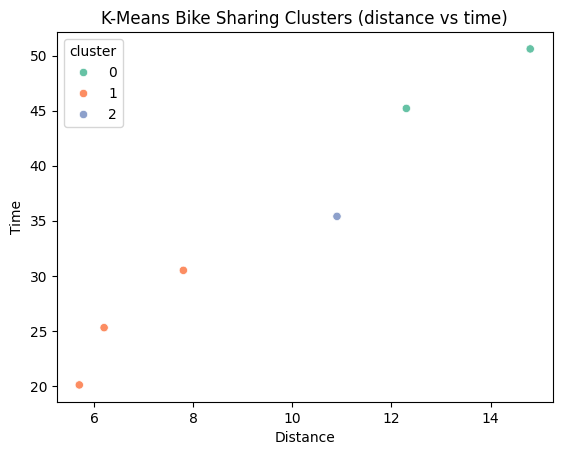

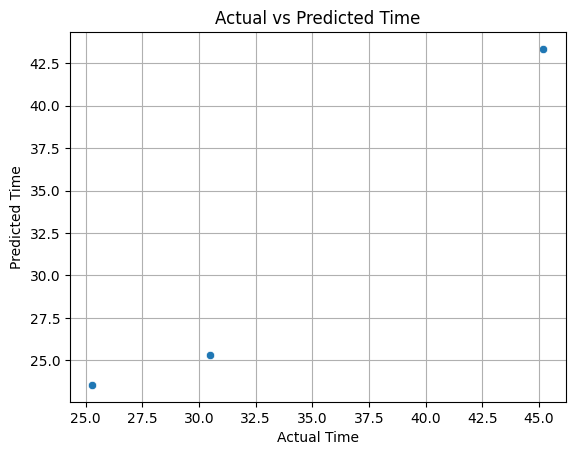

In [ ]:
import main
main.main()